# Linear Regression: Synthetic Benchmark Example
M2U3 - Exercise 5

## What are we going to do?
- We will create a reference notebook with all the steps to train a multivariate linear regression model
- We will clean up the code of any leftover comments or explanations
- We will modify the original dataset to see how it affects the trained model

Remember to follow the instructions for the submission of assignments indicated in [Submission Instructions](https://github.com/Tokio-School/Machine-Learning-EN/blob/main/Submission_instructions.md).

This exercise will be different. The last notebook was quite long and contained a lot of additional information and explanations.

We will create a reference notebook with all the steps to train a multivariate linear regression model.
We will also use this notebook as a reference to train other, non-linear regression models, and optimise their hyperparameters with a validation subset.

We also want you to take the opportunity to clean up your code cells, removing any instruction comments, hints, etc., so that you can use these cells or notebook directly in the future.

Therefore, your task in this exercise will be simple: copy the code cells from previous exercises, clean them up and leave them ready as a reference for training linear regression models.

*Note*: You can modify and add any markdown cell to add some explanation or summary to help you understand the steps to follow.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Create a synthetic dataset for linear regression

- Create it manually or with Scikit-learn's specific methods.
- Add a modifiable bias and error term.

In [2]:
m = 1000
n = 3

X = np.random.uniform(-1, 1, size=(m, n))

X = np.insert(X, 0, values=np.ones(m), axis=1)

Theta_verd = np.random.rand(n + 1)

Y = np.matmul(X, Theta_verd)

error = 0.2
ruido = np.random.normal(0, error * np.abs(Y))
Y += ruido

print('Dimensions of X and Y:')
print(X.shape)
print(Y.shape)

Dimensions of X and Y:
(1000, 4)
(1000,)


## Preprocess the data

- Randomly reorder the data.
- Normalise the data.
- Divide the dataset into training, validation, and test subsets.

In [23]:
# Shuffle the data
X, Y = shuffle(X, Y, random_state=42)

# Normalize features
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

# Split into train, validation, and test
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


## Train an initial model

- Train an initial model on the training subset without regularisation.
- Plot the history of the cost function to check its evolution.
- Test the suitability of the model.
- Retrain the model by varying the hyperparameters if necessary.
- Check if there is any deviation or overfitting..

In [4]:
#Functions

def regularized_cost_function(x, y, theta, lambda_=0.):
    m = len(y)
    predictions = x @ theta
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    j = cost + reg_term
    return float(j)

def regularized_gradient_descent(x, y, theta, alpha, lambda_=0., e=1e-6, iter_=1000):
    m, n = x.shape
    j_hist = []
    theta = theta.copy()

    for k in range(iter_):
        predictions = x @ theta
        error = predictions - y
        theta_iter = theta.copy()

        for j in range(n):
            grad = (1/m) * np.sum(error * x[:, j])
            if j > 0:
                theta_iter[j] = theta[j]*(1 - alpha*lambda_/m) - alpha*grad
            else:
                theta_iter[j] = theta[j] - alpha*grad

        theta = theta_iter
        cost = regularized_cost_function(x, y, theta, lambda_)
        j_hist.append(cost)

        if k > 0 and abs(j_hist[-2] - j_hist[-1]) < e:
            print(f"Converges at iteration {k}")
            break
    else:
        print("Maximum number of iterations reached")

    return j_hist, theta


In [5]:
# Initial model on the training subset without regularisation.
theta_ini = np.zeros(X.shape[1])
alpha = 1e-1
lambda_ = 0.
e = 1e-3
iter_ =  int(1e2)
print("Hiper-arámetros usados:")
print("Alpha:", alpha, "Error máx.:", e, "Nº iter", iter_)
print()
j_hist, theta_final = regularized_gradient_descent(X_train, Y_train, theta_ini, alpha, lambda_=lambda_, e=e, iter_=iter_)
print('\nFinal cost:')
print(j_hist[-1])

Hiper-arámetros usados:
Alpha: 0.1 Error máx.: 0.001 Nº iter 100

Converges at iteration 21

Final cost:
0.019383818985475112


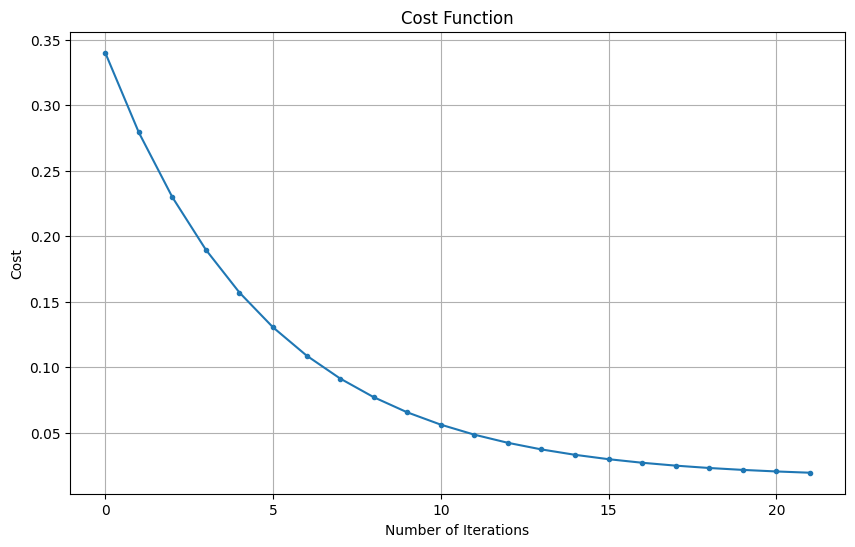

In [6]:
# Plot
plt.figure(figsize=(10, 6))
plt.title('Cost Function')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.plot(j_hist, marker='o', linestyle='-', markersize=3)
plt.grid()
plt.show()


In [7]:
# Predictions
Y_train_pred = X_train @ theta_final
Y_test_pred  = X_test  @ theta_final

# Metrics
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test  = mean_squared_error(Y_test, Y_test_pred)

mae_train = mean_absolute_error(Y_train, Y_train_pred)
mae_test  = mean_absolute_error(Y_test, Y_test_pred)

r2_train = r2_score(Y_train, Y_train_pred)
r2_test  = r2_score(Y_test, Y_test_pred)

print("Train MSE:", mse_train, "Test MSE:", mse_test)
print("Train MAE:", mae_train, "Test MAE:", mae_test)
print("Train R²:", r2_train, "Test R²:", r2_test)

Train MSE: 0.038767637970950224 Test MSE: 0.030371970964085785
Train MAE: 0.1324337232655043 Test MAE: 0.12062445549290982
Train R²: 0.8965553834509343 Test R²: 0.8978201197372297


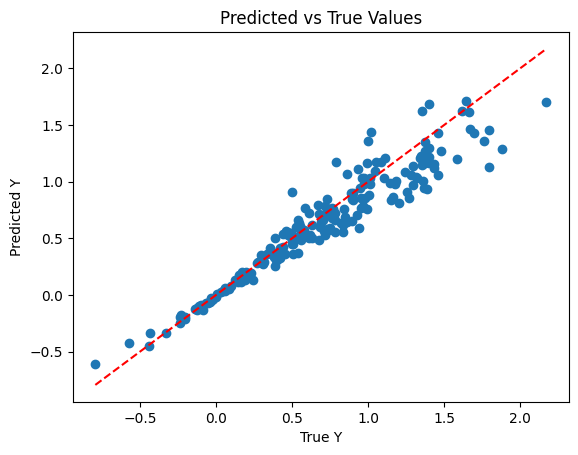

In [8]:
# Plot predicted vs true
plt.scatter(Y_test, Y_test_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.title('Predicted vs True Values')
plt.show()

In [9]:
# Varying the hyperparameters
theta_ini = np.zeros(X.shape[1])
alpha = 1e-1
lambda_ = 0.
e = 1e-3
iter_ =  int(1e2)

j_hist, theta_final = regularized_gradient_descent(X_train, Y_train, theta_ini, alpha, lambda_=lambda_, e=e, iter_=iter_)

print('\nFinal cost:')
print(j_hist[-1])

# Predictions
Y_train_pred = X_train @ theta_final
Y_test_pred  = X_test  @ theta_final

# Metrics
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test  = mean_squared_error(Y_test, Y_test_pred)

mae_train = mean_absolute_error(Y_train, Y_train_pred)
mae_test  = mean_absolute_error(Y_test, Y_test_pred)

r2_train = r2_score(Y_train, Y_train_pred)
r2_test  = r2_score(Y_test, Y_test_pred)

print("\nTrain MSE:", mse_train, "Test MSE:", mse_test)
print("Train MAE:", mae_train, "Test MAE:", mae_test)
print("Train R²:", r2_train, "Test R²:", r2_test)

Converges at iteration 21

Final cost:
0.019383818985475112

Train MSE: 0.038767637970950224 Test MSE: 0.030371970964085785
Train MAE: 0.1324337232655043 Test MAE: 0.12062445549290982
Train R²: 0.8965553834509343 Test R²: 0.8978201197372297


In [10]:
# Deviation or overfitting

print("\nDifference in MSE (Test - Train):", mse_test - mse_train)
print("Difference in MAE (Test - Train):", mae_test - mae_train)
print("Difference in R² (Train - Test):", r2_train - r2_test)

# Differences between train and test:
# Large positive values of (Test - Train) MSE or MAE, or (Train - Test) R², indicate possible overfitting.
# Small differences suggest the model is well-fitted.



Difference in MSE (Test - Train): -0.008395667006864439
Difference in MAE (Test - Train): -0.011809267772594473
Difference in R² (Train - Test): -0.0012647362862954203


## Find the optimal *lambda* on the validation subset

- Train a model for each lambda value to be considered
- Plot the final error over the training and validation subset of each model/*lambda*.
- Choose the optimal model and *lambda* value

In [11]:
lambdas = [0., 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1, 1e0, 3e0, 1e1]

j_train = np.zeros(len(lambdas))
j_val = np.zeros(len(lambdas))
theta_val = np.zeros((len(lambdas), X_train.shape[1]))

for i, lam in enumerate(lambdas):
    j_hist, theta_final = regularized_gradient_descent(X_train, Y_train, theta_ini, alpha, lambda_=lam, e=e, iter_=iter_)

    j_train[i] = j_hist[-1]
    theta_val[i] = theta_final

    Y_val_pred = X_val @ theta_final
    j_val[i] = np.mean((Y_val - Y_val_pred)**2)


Converges at iteration 21
Converges at iteration 21
Converges at iteration 21
Converges at iteration 21
Converges at iteration 21
Converges at iteration 21
Converges at iteration 21
Converges at iteration 21
Converges at iteration 21
Converges at iteration 21


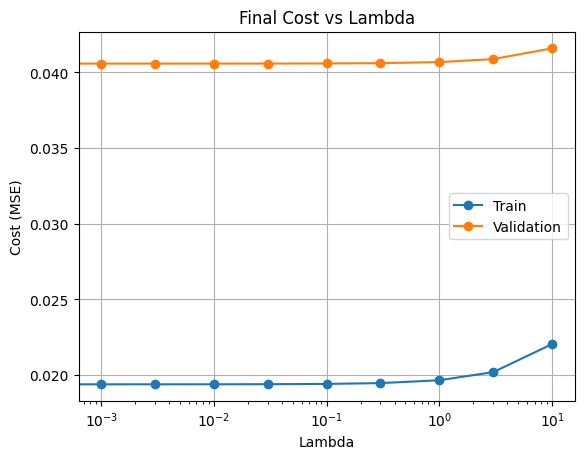

In [12]:
plt.plot(lambdas, j_train, marker='o', linestyle='-', label='Train')
plt.plot(lambdas, j_val, marker='o', linestyle='-', label='Validation')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cost (MSE)')
plt.title('Final Cost vs Lambda')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Best lambda
theta_final = theta_val[np.argmin(j_val)]
lambda_final = lambdas[np.argmin(j_val)]
j_final = j_val[np.argmin(j_val)]

print(lambda_final)
print(j_final)
print(theta_final)


0.0
0.040568246121578395
[0.61404907 0.2867036  0.17234973 0.40676056]


## Finally, evaluate the model on the test subset

- Calculate the cost of the model on the test subset using the corresponding *theta* and *lambda*.
- Display a summary of your evaluation metric(s): RMSE, R^2, etc.
- Calculate the residuals on the test subset and plot them..

In [14]:
# Predictions on test set
Y_test_pred = X_test @ theta_final

# Metrics
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
r2_test = r2_score(Y_test, Y_test_pred)

print("Test RMSE:", rmse_test)
print("Test R²:", r2_test)

Test RMSE: 0.17427556043256837
Test R²: 0.8978201197372297


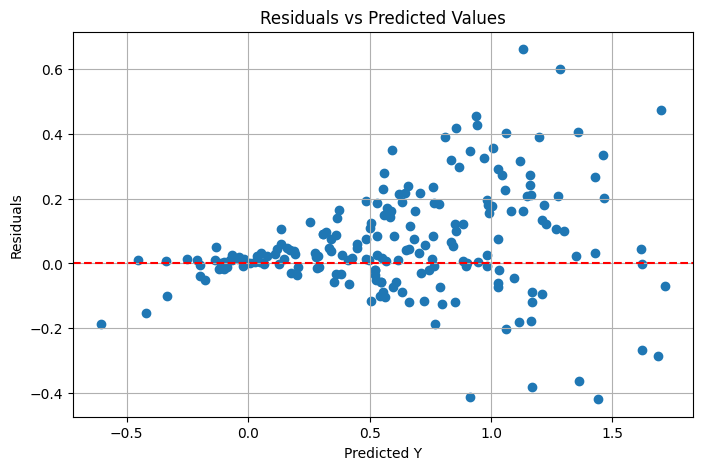

In [15]:
# Residuals
residuals = Y_test - Y_test_pred

# Plot residuals
plt.figure(figsize=(8,5))
plt.scatter(Y_test_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

## Make predictions about new examples

- Generate a new example, following the same pattern as the original dataset.
- Normalise its features.
- Generate a prediction for this new example.

In [26]:
X_new = np.array([[1.0, 0.3, -0.5, 0.1]])
X_new[:, 1:] = scaler.transform(X_new[:, 1:])
Y_new_pred = X_new @ theta_final
print(Y_new_pred)


[0.65456134]
